In [1]:
print("Hello, World")

Hello, World


In [2]:
import os
import pandas as pd
from six.moves import urllib
from zipfile import ZipFile

DOWNLOAD_URL = "https://www.kaggle.com/api/v1/datasets/download/uciml/red-wine-quality-cortez-et-al-2009"
WINE_DATASET_PATH = os.path.join("datasets", "winequality-red")

def fetch_dataset(download_url=DOWNLOAD_URL, dataset_path=WINE_DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
    zip_path = os.path.join(dataset_path, "winequality-red.zip")
    urllib.request.urlretrieve(download_url, zip_path)
    zipped_file = ZipFile(zip_path, 'r')
    zipped_file.extractall(path=dataset_path)
    zipped_file.close()

def load_dataset(dataset_path=WINE_DATASET_PATH):
    csv_path = os.path.join(dataset_path, "winequality-red.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_dataset()

In [4]:
wines = load_dataset()
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


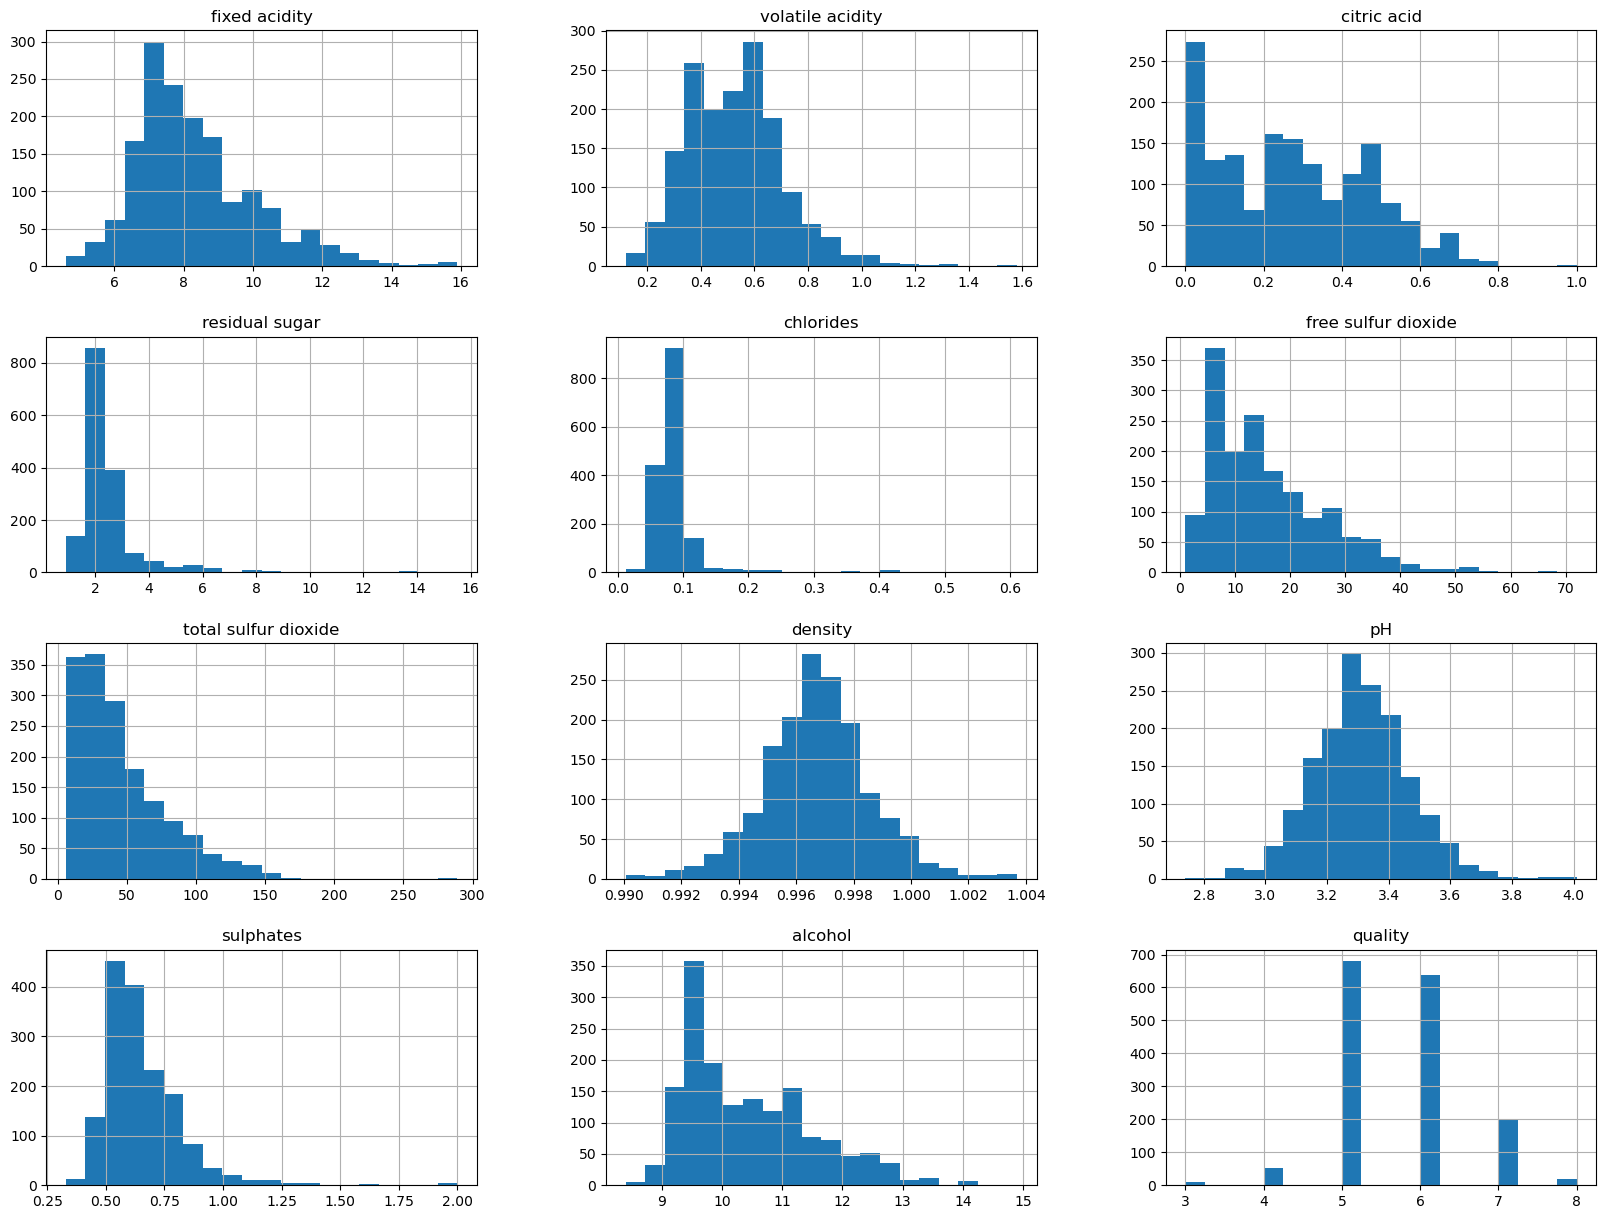

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
wines.hist(bins = 20, figsize=(20,15))
plt.show()

In [8]:
wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
import numpy as np

wines["alcohol_cat"] = pd.cut(wines["alcohol"],
                              bins = [0.,9.0,10.0,11.0,12.0,13.,np.inf],
                              labels=[1,2,3,4,5,6])

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(wines, wines["alcohol_cat"]):
    strat_train_set = wines.loc[train_index]
    strat_test_set = wines.loc[test_index]

In [11]:
strat_test_set["alcohol_cat"].value_counts() / len(strat_test_set)

alcohol_cat
2    0.443750
3    0.278125
4    0.165625
5    0.075000
1    0.021875
6    0.015625
Name: count, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("alcohol_cat", axis=1, inplace=True)

In [13]:
wines = strat_train_set.copy()

In [17]:
wines = wines.drop("quality", axis=1)
wine_labels = strat_train_set["quality"].copy()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = StandardScaler()
wine_prepared = pipeline.fit_transform(wines)

In [23]:
print(wine_prepared[0])

[-0.00729758  0.05720319 -0.14838074  0.56683195 -0.24644212  0.01473825
  2.00139384  0.45463392 -0.27140817 -0.28387524 -0.96247716]


In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
>>> from sklearn.metrics import mean_squared_error
>>> quality_predictions = lin_reg.predict(wine_prepared)
>>> lin_mse = mean_squared_error(wine_labels, quality_predictions)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse

np.float64(0.6359259139953616)

In [30]:
from sklearn.metrics import mean_squared_error

test = strat_test_set.drop("quality", axis=1)
test_labels = strat_test_set["quality"]

test_prepared = pipeline.fit_transform(test)
test_set_predictions = lin_reg.predict(test_prepared)
lin_mse = mean_squared_error(test_set_predictions, test_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.6842519716649128)

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_prepared, wine_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
>>> quality_predictions = tree_reg.predict(wine_prepared)
>>> tree_mse = mean_squared_error(wine_labels, quality_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

np.float64(0.0)

In [33]:
test_set_predictions = tree_reg.predict(test_prepared)
lin_mse = mean_squared_error(test_set_predictions, test_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.8767838958375092)

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Deviation: ", scores.std())

Scores:  [-0.6875     -0.59375    -0.9453125  -0.65625    -0.6640625  -0.65625
 -0.578125   -0.828125   -0.515625   -0.65354331]
Mean:  -0.6778543307086614
Standard Deviation:  0.11800879355807993


In [37]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='linear')
svr_regressor.fit(wine_prepared, wine_labels)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [38]:
>>> quality_predictions = svr_regressor.predict(wine_prepared)
>>> tree_mse = mean_squared_error(wine_labels, quality_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

np.float64(0.6420024504729925)

In [39]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(wine_prepared, wine_labels)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [40]:
>>> quality_predictions = svr_regressor.predict(wine_prepared)
>>> tree_mse = mean_squared_error(wine_labels, quality_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

np.float64(0.5366076035702637)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'degree': [3], 'gamma': ['auto'], 'C': [2.0, 2.2, 2.4, 2.6, 2.8, 3.0], 'kernel': ['rbf']},
]

svr_regressor = SVR()

grid_search = GridSearchCV(svr_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(wine_prepared, wine_labels)

,estimator,SVR()
,param_grid,"[{'C': [2.0, 2.2, ...], 'degree': [3], 'gamma': ['auto'], 'kernel': ['rbf']}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,kernel,'rbf'


In [56]:
grid_search.best_params_

{'C': 2.2, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [57]:
grid_search.best_estimator_

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,C,2.2
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [61]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test)

final_mse = mean_squared_error(final_predictions, test_labels)
final_rmse = np.sqrt(final_mse)
final_rmse

/nix/store/6jjx3hgkm9g6jdw8milf7icscmrrnwnd-python3-3.13.8-env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


np.float64(0.8520842081677249)